# Bootstrapping
For a population $x$ of the size $N$, this technique resamples a new set $x_1^*$ of the same size, while smapling with replacement is performed. The mean $\mu_1^*$ of this set is calcutated and this process is repeated 100 times resulting in a set $M = \{ \mu_1^*, \dots, \mu_{100}^* \}$. One can now optian the *bootstrap confidence interval*, which gives an convidence interval of the calculated mean of $x$.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import netCDF4 as nc
import scipy
import scikits.bootstrap as bootstrap

In [6]:
ds = nc.Dataset('../Data/Weather/day20_850_temp.nc')

In [7]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    history: 2009-05-20 12:03:56 GMT by mars2netcdf-0.92
    dimensions(sizes): longitude(144), latitude(73), number(9), time(1)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 number(number), int32 time(time), int16 cnrm(time, number, latitude, longitude), int16 crfc(time, number, latitude, longitude), int16 lody(time, number, latitude, longitude), int16 scnr(time, number, latitude, longitude), int16 scwf(time, number, latitude, longitude), int16 smpi(time, number, latitude, longitude), int16 ukmo(time, number, latitude, longitude)
    groups: 


In [8]:
cnrm = data=ds['cnrm'][0]
print(cnrm.shape)

(9, 73, 144)


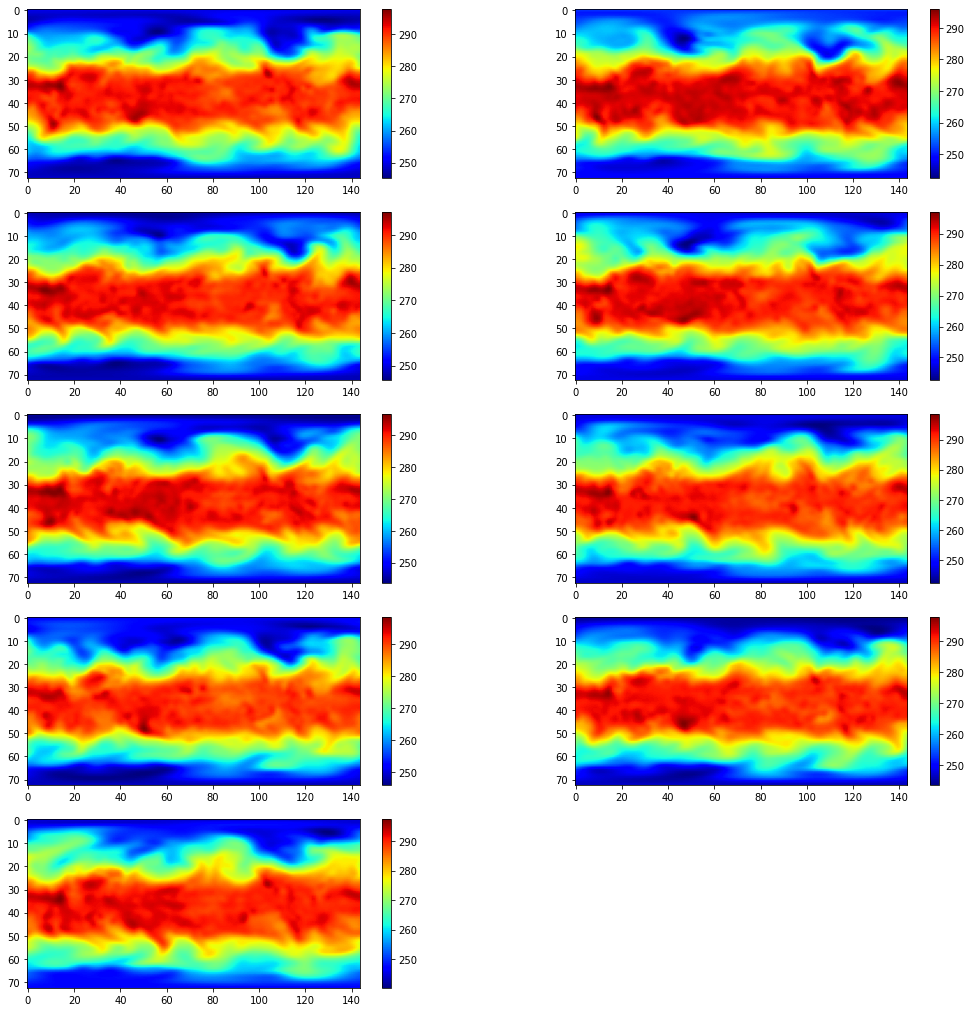

In [24]:
plt.figure(figsize=(18,6*3))
for i in range(cnrm.shape[0]):
    plt.subplot(np.int32(np.ceil(cnrm.shape[0]/2.)),2,i+1)
    plt.imshow(cnrm[i,:,:], cmap='jet')
    plt.colorbar()
plt.show()

In [ ]:
bootstrapped_mean = np.array([[bootstrap.ci(data=pixel, n_samples=1000) for pixel in row] for row in cnrm.transpose()])

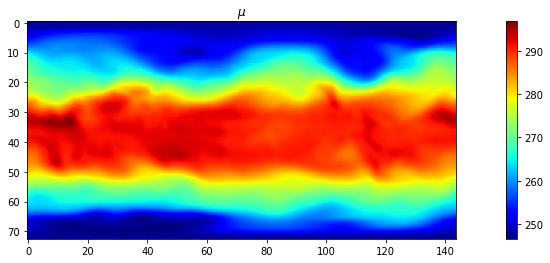

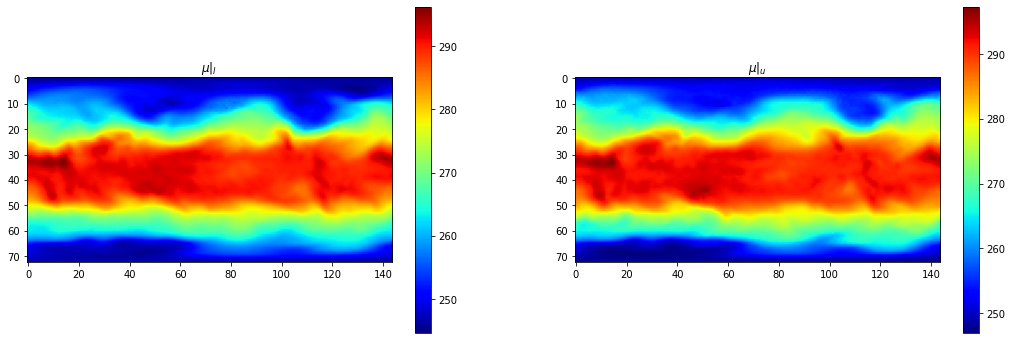

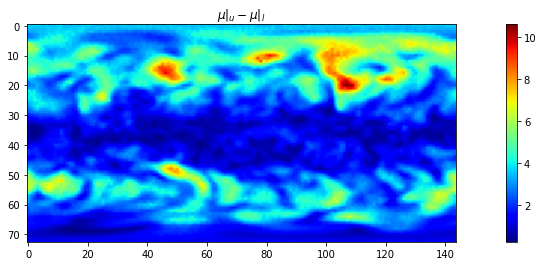

In [34]:
plt.figure(figsize=(18,4))
plt.imshow(np.mean(cnrm, axis=0), cmap='jet')
plt.title('$\mu$')
plt.colorbar()
plt.show()

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.imshow(bootstrapped_mean[:,:,0].transpose(), cmap='jet')
plt.title('$\mu|_l$')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(bootstrapped_mean[:,:,1].transpose(), cmap='jet')
plt.title('$\mu|_u$')
plt.colorbar()
plt.show()

plt.figure(figsize=(18,4))
plt.imshow((bootstrapped_mean[:,:,1] - bootstrapped_mean[:,:,0]).transpose(), cmap='jet')
plt.title('$\mu|_u - \mu|_l$')
plt.colorbar()
plt.show()